<center>
    <h1><b>Phân Tích và Dự Đoán Trạng Thái Tâm Lý Qua Miêu Tả Dạng Văn Bản</b></h1>
    <h2><b>Học phần: Học máy</b></h2>
    <h3><b>Giảng viên: TS. Cao Văn Chung</b></h3>
</center>

---
<center>
<h1><b>Phân loại bằng mô hình rừng ngẫu nhiên</b></h1>
</center>

**Sinh viên thực hiện:**
- Trần Anh Minh - 21000242
- Dương Đức Vương - 22000133
- Nguyễn Tuấn Kiệt - 22000100

Các thư viện cần thiết

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as mp
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.stem import PorterStemmer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

Đọc dữ liệu và cột số thứ tự không cần thiết, loại bỏ các mẫu bị thiếu dữ liệu

In [2]:
df = pd.read_csv("New Data.csv")
df.drop('Unnamed: 0',axis=1,inplace=True)

df.dropna(inplace=True)

max_count = df['status'].value_counts().max()

Hàm resample dữ liệu để tránh mất cân bằng dữ liệu

In [3]:
def resample_data(df):
    max_count = df['status'].value_counts().max()

    df_resampled = pd.DataFrame()

    for status in df['status'].unique():
        df_class = df[df['status'] == status]
        if len(df_class) < max_count:
            df_class_resampled = resample(df_class,
                                          replace=True,
                                          n_samples=max_count,
                                          random_state=42)
            df_resampled = pd.concat([df_resampled, df_class_resampled])
        else:
            df_resampled = pd.concat([df_resampled, df_class])

    return df_resampled

Hàm các bước tiền xử lý dữ liệu

In [4]:
pt = PorterStemmer()


def preprocessing(x):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', x.lower())
    return " ".join(pt.stem(word) for word in text.split())

Áp dụng tiền xử lý dữ liệu và thực hiện resample

In [5]:
df['statement'] = df['statement'].apply(preprocessing)
df = resample_data(df)

Phân chia dữ liệu cho huấn luyện và kiểm thử với các tỷ lệ khác nhau

In [6]:
x = df['statement']
y = df['status']

x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, random_state=42, test_size=0.2)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, random_state=42, test_size=0.3)
x_train3, x_test3, y_train3, y_test3 = train_test_split(x, y, random_state=42, test_size=0.4)

Vector hóa các tập huấn luyện bằng vector TF-IDF

In [7]:
vec1 = TfidfVectorizer()
x_train_tfidf1 = vec1.fit_transform(x_train1)
x_test_tfidf1 = vec1.transform(x_test1)

vec2 = TfidfVectorizer()
x_train_tfidf2 = vec2.fit_transform(x_train2)
x_test_tfidf2 = vec2.transform(x_test2)

vec3 = TfidfVectorizer()
x_train_tfidf3 = vec3.fit_transform(x_train3)
x_test_tfidf3 = vec3.transform(x_test3)

Mô hình 1 cây tỷ lệ train:test = 8:2

In [8]:
clf = RandomForestClassifier(n_estimators=1, random_state=42)
clf.fit(x_train_tfidf1, y_train1)
y_pred1 = clf.predict(x_test_tfidf1)

acc = accuracy_score(y_test1, y_pred1)
print(f"Accuracy: {acc:.4f}\n")

Accuracy: 0.9263



In [9]:
print("Classification Report:\n")
print(classification_report(y_test1, y_pred1, zero_division=0))

Classification Report:

                      precision    recall  f1-score   support

             Anxiety       0.92      0.99      0.95      5023
             Bipolar       0.94      0.99      0.97      5343
          Depression       0.91      0.68      0.78      5281
              Normal       0.87      0.91      0.89      5241
Personality disorder       0.97      1.00      0.99      5190
              Stress       0.93      0.99      0.96      5190

            accuracy                           0.93     31268
           macro avg       0.93      0.93      0.92     31268
        weighted avg       0.93      0.93      0.92     31268



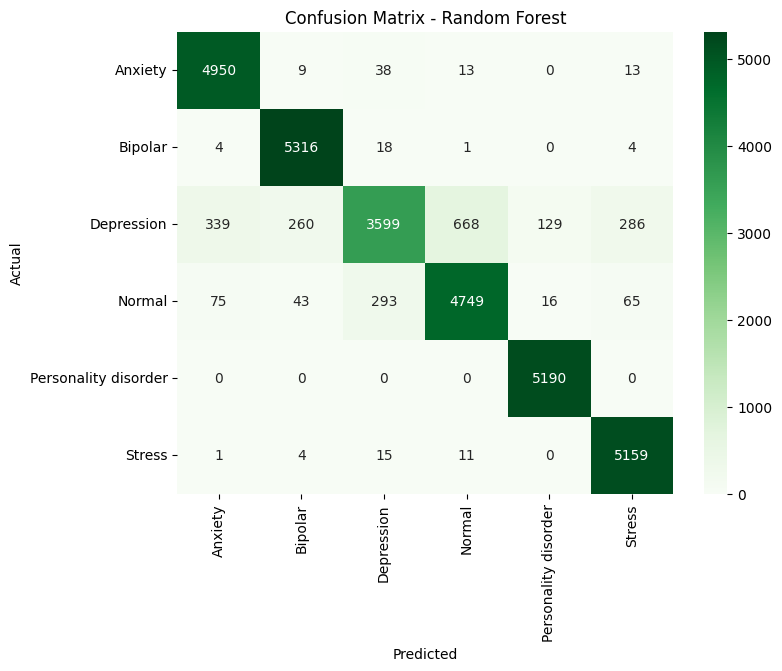

In [10]:
cm = confusion_matrix(y_test1, y_pred1, labels=clf.classes_)

mp.figure(figsize=(8, 6))
sn.heatmap(cm, annot=True, fmt='d', cmap='Greens',
               xticklabels=clf.classes_, yticklabels=clf.classes_)
mp.title(f'Confusion Matrix - Random Forest')
mp.xlabel('Predicted')
mp.ylabel('Actual')
mp.show()

Mô hình 1 cây tỷ lệ train:test = 7:3

In [11]:
clf.fit(x_train_tfidf2, y_train2)
y_pred2 = clf.predict(x_test_tfidf2)

acc = accuracy_score(y_test2, y_pred2)
print(f"Accuracy: {acc:.4f}\n")

Accuracy: 0.9246



In [12]:
print("Classification Report:\n")
print(classification_report(y_test2, y_pred2, zero_division=0))

Classification Report:

                      precision    recall  f1-score   support

             Anxiety       0.92      0.98      0.95      7681
             Bipolar       0.94      0.99      0.96      7984
          Depression       0.91      0.69      0.78      7846
              Normal       0.88      0.89      0.89      7817
Personality disorder       0.97      1.00      0.99      7862
              Stress       0.92      0.99      0.96      7711

            accuracy                           0.92     46901
           macro avg       0.92      0.92      0.92     46901
        weighted avg       0.92      0.92      0.92     46901



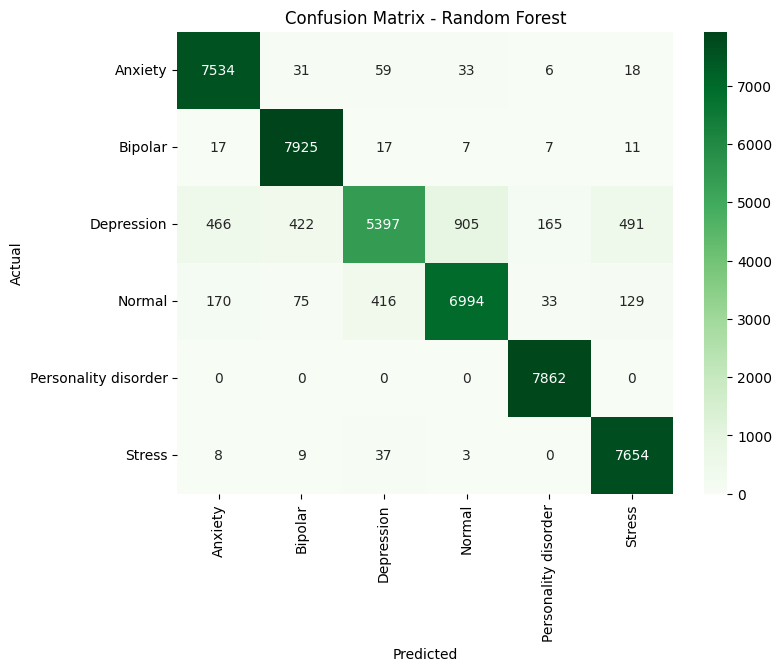

In [13]:
cm = confusion_matrix(y_test2, y_pred2, labels=clf.classes_)

mp.figure(figsize=(8, 6))
sn.heatmap(cm, annot=True, fmt='d', cmap='Greens',
               xticklabels=clf.classes_, yticklabels=clf.classes_)
mp.title(f'Confusion Matrix - Random Forest')
mp.xlabel('Predicted')
mp.ylabel('Actual')
mp.show()

Mô hình 1 cây tỷ lệ train:test = 6:4

In [14]:
clf.fit(x_train_tfidf3, y_train3)
y_pred3 = clf.predict(x_test_tfidf3)

acc = accuracy_score(y_test3, y_pred3)
print(f"Accuracy: {acc:.4f}\n")

Accuracy: 0.9091



In [15]:
print("Classification Report:\n")
print(classification_report(y_test3, y_pred3, zero_division=0))

Classification Report:

                      precision    recall  f1-score   support

             Anxiety       0.90      0.96      0.93     10272
             Bipolar       0.92      0.99      0.95     10525
          Depression       0.88      0.64      0.74     10471
              Normal       0.87      0.88      0.88     10480
Personality disorder       0.97      1.00      0.98     10483
              Stress       0.91      0.99      0.95     10304

            accuracy                           0.91     62535
           macro avg       0.91      0.91      0.90     62535
        weighted avg       0.91      0.91      0.90     62535



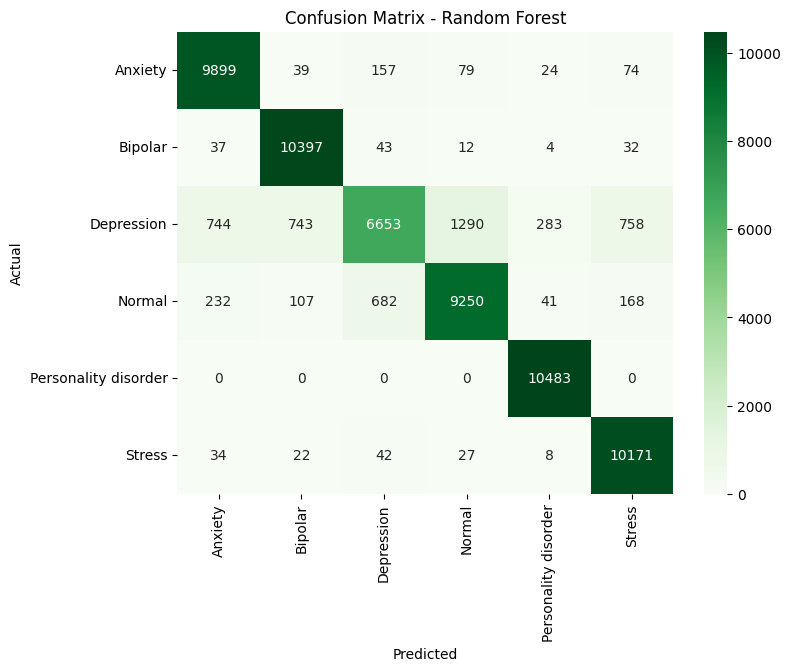

In [16]:
cm = confusion_matrix(y_test3, y_pred3, labels=clf.classes_)

mp.figure(figsize=(8, 6))
sn.heatmap(cm, annot=True, fmt='d', cmap='Greens',
               xticklabels=clf.classes_, yticklabels=clf.classes_)
mp.title(f'Confusion Matrix - Random Forest')
mp.xlabel('Predicted')
mp.ylabel('Actual')
mp.show()

Mô hình 100 cây tỷ lệ train:test = 8:2

In [17]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train_tfidf1, y_train1)
y_pred1 = clf.predict(x_test_tfidf1)

acc = accuracy_score(y_test1, y_pred1)
print(f"Accuracy: {acc:.4f}\n")

Accuracy: 0.9849



In [18]:
print("Classification Report:\n")
print(classification_report(y_test1, y_pred1, zero_division=0))

Classification Report:

                      precision    recall  f1-score   support

             Anxiety       1.00      1.00      1.00      5023
             Bipolar       1.00      1.00      1.00      5343
          Depression       0.97      0.94      0.96      5281
              Normal       0.94      0.97      0.96      5241
Personality disorder       1.00      1.00      1.00      5190
              Stress       1.00      1.00      1.00      5190

            accuracy                           0.98     31268
           macro avg       0.99      0.99      0.99     31268
        weighted avg       0.99      0.98      0.98     31268



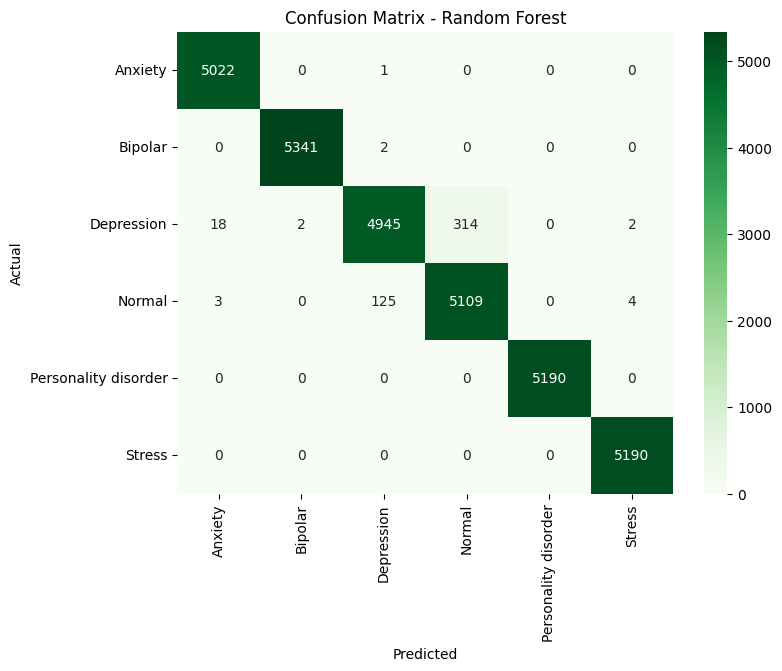

In [19]:
cm = confusion_matrix(y_test1, y_pred1, labels=clf.classes_)

mp.figure(figsize=(8, 6))
sn.heatmap(cm, annot=True, fmt='d', cmap='Greens',
               xticklabels=clf.classes_, yticklabels=clf.classes_)
mp.title(f'Confusion Matrix - Random Forest')
mp.xlabel('Predicted')
mp.ylabel('Actual')
mp.show()

Mô hình 100 cây tỷ lệ train:test = 7:3

In [20]:
clf.fit(x_train_tfidf2, y_train2)
y_pred2 = clf.predict(x_test_tfidf2)

acc = accuracy_score(y_test2, y_pred2)
print(f"Accuracy: {acc:.4f}\n")

Accuracy: 0.9830



In [21]:
print("Classification Report:\n")
print(classification_report(y_test2, y_pred2, zero_division=0))

Classification Report:

                      precision    recall  f1-score   support

             Anxiety       1.00      1.00      1.00      7681
             Bipolar       1.00      1.00      1.00      7984
          Depression       0.97      0.93      0.95      7846
              Normal       0.94      0.97      0.95      7817
Personality disorder       1.00      1.00      1.00      7862
              Stress       1.00      1.00      1.00      7711

            accuracy                           0.98     46901
           macro avg       0.98      0.98      0.98     46901
        weighted avg       0.98      0.98      0.98     46901



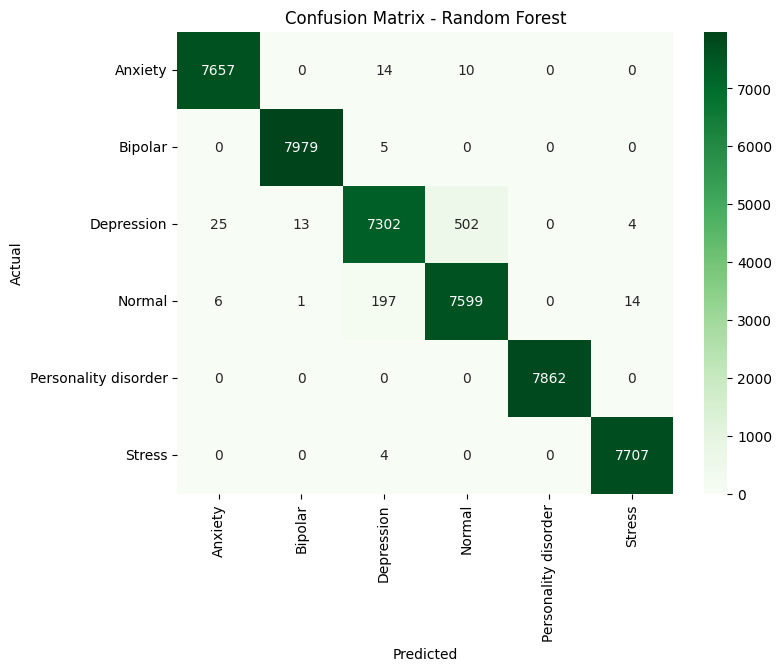

In [22]:
cm = confusion_matrix(y_test2, y_pred2, labels=clf.classes_)

mp.figure(figsize=(8, 6))
sn.heatmap(cm, annot=True, fmt='d', cmap='Greens',
               xticklabels=clf.classes_, yticklabels=clf.classes_)
mp.title(f'Confusion Matrix - Random Forest')
mp.xlabel('Predicted')
mp.ylabel('Actual')
mp.show()

Mô hình 100 cây tỷ lệ train:test = 6:4

In [23]:
clf.fit(x_train_tfidf3, y_train3)
y_pred3 = clf.predict(x_test_tfidf3)

acc = accuracy_score(y_test3, y_pred3)
print(f"Accuracy: {acc:.4f}\n")

Accuracy: 0.9818



In [24]:
print("Classification Report:\n")
print(classification_report(y_test3, y_pred3, zero_division=0))

Classification Report:

                      precision    recall  f1-score   support

             Anxiety       0.99      1.00      1.00     10272
             Bipolar       1.00      1.00      1.00     10525
          Depression       0.97      0.93      0.95     10471
              Normal       0.94      0.97      0.95     10480
Personality disorder       1.00      1.00      1.00     10483
              Stress       1.00      1.00      1.00     10304

            accuracy                           0.98     62535
           macro avg       0.98      0.98      0.98     62535
        weighted avg       0.98      0.98      0.98     62535



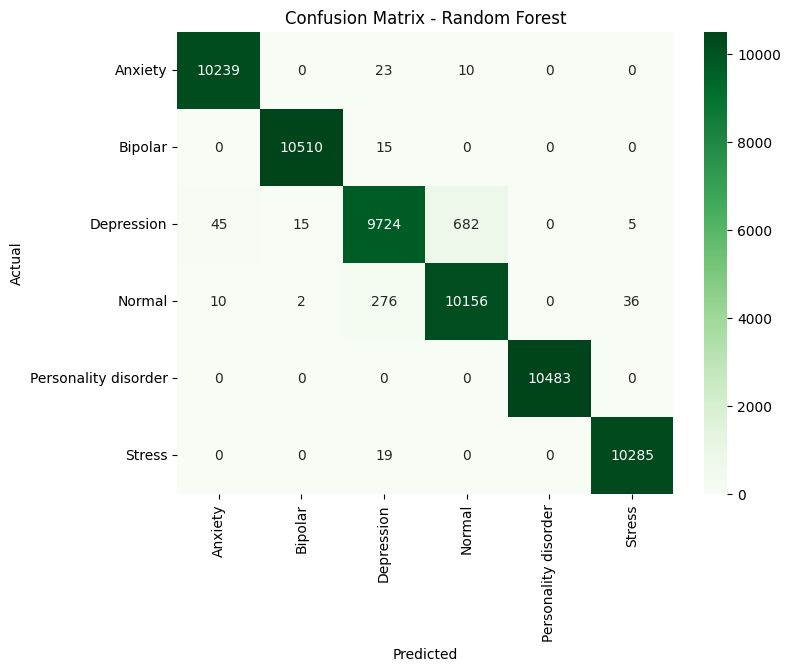

In [25]:
cm = confusion_matrix(y_test3, y_pred3, labels=clf.classes_)

mp.figure(figsize=(8, 6))
sn.heatmap(cm, annot=True, fmt='d', cmap='Greens',
               xticklabels=clf.classes_, yticklabels=clf.classes_)
mp.title(f'Confusion Matrix - Random Forest')
mp.xlabel('Predicted')
mp.ylabel('Actual')
mp.show()

Mô hình 200 cây tỷ lệ train:test = 8:2

In [26]:
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(x_train_tfidf1, y_train1)
y_pred1 = clf.predict(x_test_tfidf1)

acc = accuracy_score(y_test1, y_pred1)
print(f"Accuracy: {acc:.4f}\n")

Accuracy: 0.9855



In [27]:
print("Classification Report:\n")
print(classification_report(y_test1, y_pred1, zero_division=0))

Classification Report:

                      precision    recall  f1-score   support

             Anxiety       1.00      1.00      1.00      5023
             Bipolar       1.00      1.00      1.00      5343
          Depression       0.97      0.94      0.96      5281
              Normal       0.94      0.97      0.96      5241
Personality disorder       1.00      1.00      1.00      5190
              Stress       1.00      1.00      1.00      5190

            accuracy                           0.99     31268
           macro avg       0.99      0.99      0.99     31268
        weighted avg       0.99      0.99      0.99     31268



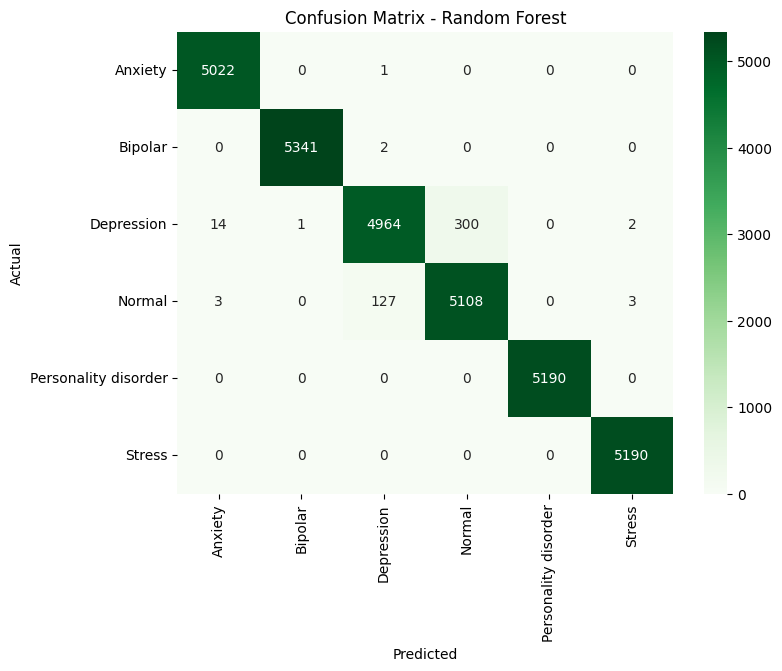

In [28]:
cm = confusion_matrix(y_test1, y_pred1, labels=clf.classes_)

mp.figure(figsize=(8, 6))
sn.heatmap(cm, annot=True, fmt='d', cmap='Greens',
               xticklabels=clf.classes_, yticklabels=clf.classes_)
mp.title(f'Confusion Matrix - Random Forest')
mp.xlabel('Predicted')
mp.ylabel('Actual')
mp.show()

Mô hình 200 cây tỷ lệ train:test = 7:3

In [29]:
clf.fit(x_train_tfidf2, y_train2)
y_pred2 = clf.predict(x_test_tfidf2)

acc = accuracy_score(y_test2, y_pred2)
print(f"Accuracy: {acc:.4f}\n")

Accuracy: 0.9839



In [30]:
print("Classification Report:\n")
print(classification_report(y_test2, y_pred2, zero_division=0))

Classification Report:

                      precision    recall  f1-score   support

             Anxiety       1.00      1.00      1.00      7681
             Bipolar       1.00      1.00      1.00      7984
          Depression       0.97      0.93      0.95      7846
              Normal       0.94      0.97      0.96      7817
Personality disorder       1.00      1.00      1.00      7862
              Stress       1.00      1.00      1.00      7711

            accuracy                           0.98     46901
           macro avg       0.98      0.98      0.98     46901
        weighted avg       0.98      0.98      0.98     46901



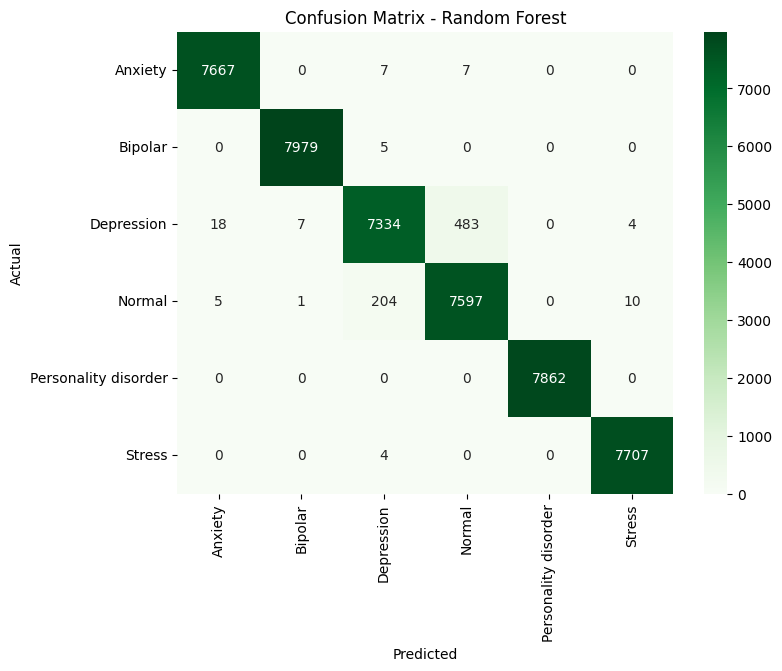

In [31]:
cm = confusion_matrix(y_test2, y_pred2, labels=clf.classes_)

mp.figure(figsize=(8, 6))
sn.heatmap(cm, annot=True, fmt='d', cmap='Greens',
               xticklabels=clf.classes_, yticklabels=clf.classes_)
mp.title(f'Confusion Matrix - Random Forest')
mp.xlabel('Predicted')
mp.ylabel('Actual')
mp.show()

Mô hình 1 cây tỷ lệ train:test = 6:4

In [32]:
clf.fit(x_train_tfidf3, y_train3)
y_pred3 = clf.predict(x_test_tfidf3)

acc = accuracy_score(y_test3, y_pred3)
print(f"Accuracy: {acc:.4f}\n")

Accuracy: 0.9823



In [33]:
print("Classification Report:\n")
print(classification_report(y_test3, y_pred3, zero_division=0))

Classification Report:

                      precision    recall  f1-score   support

             Anxiety       0.99      1.00      1.00     10272
             Bipolar       1.00      1.00      1.00     10525
          Depression       0.97      0.93      0.95     10471
              Normal       0.94      0.97      0.95     10480
Personality disorder       1.00      1.00      1.00     10483
              Stress       1.00      1.00      1.00     10304

            accuracy                           0.98     62535
           macro avg       0.98      0.98      0.98     62535
        weighted avg       0.98      0.98      0.98     62535



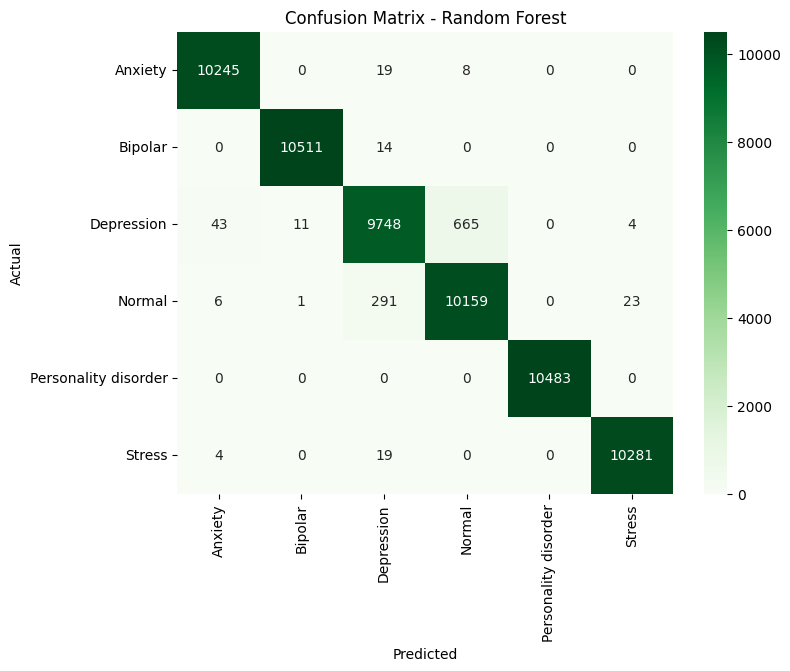

In [34]:
cm = confusion_matrix(y_test3, y_pred3, labels=clf.classes_)

mp.figure(figsize=(8, 6))
sn.heatmap(cm, annot=True, fmt='d', cmap='Greens',
               xticklabels=clf.classes_, yticklabels=clf.classes_)
mp.title(f'Confusion Matrix - Random Forest')
mp.xlabel('Predicted')
mp.ylabel('Actual')
mp.show()